
questions:

1) what are ain.dat and bin.dat?  in files for two fields

2) Should I change the potiential used? yes to my potiential

3) the cosh function was just plugged in, is this allowed? apparently yes

4) in line 101 to 105 you set Au = Bu, why? this is still a mystery

5)


# eqns to solve:
shoudl check with evan!
$$\partial^{2}_{t} \phi - \nabla^{2} \phi + f'(x,t) = 0 $$

/home/athul_muralidhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in double_scalars
/home/athul_muralidhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in double_scalars


[  1.53055962  -4.14859273 -53.69427123  55.7620431   59.38014644
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          

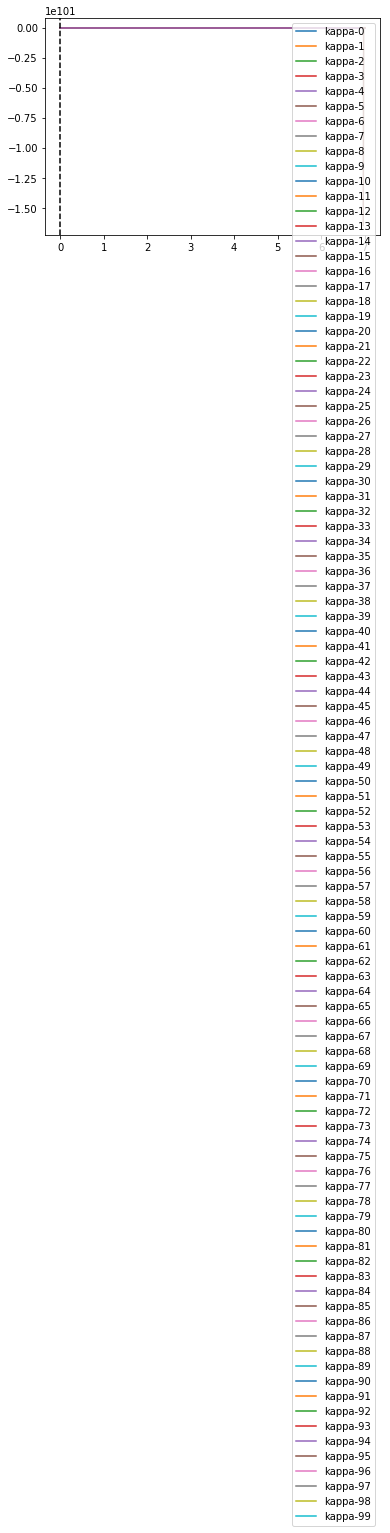

In [6]:
#!/bin /python

"""
This code attempts to sovle the relevant equations for a single field Oscillon

This code is written in Python 3
Author: Athul Muralidhar
Date: 10 May 2018
Due credits given to S.Evangelos for his guidence and  utmost patience, and helping
the author with the code.

Algorithm details:

RK-O(4) backwards method used with numpy implimentation.
"""
# initial imports:
import matplotlib.pyplot as plt
import numpy as np

# functions for inegration:

def driver(x_init,x_final,dx,xout,y1,y2):
    """driver function
    the outputs of this function are three numpy arrays with 0's at the end, but
    has been reshaped conveniently for further usage
    """

    arr_len = int((x_final - x_init)//dx+2)
    # print(arr_len)
    m = 0
    x = x_init
    x_arr = np.empty(arr_len, dtype = np.float_)
    y_1_arr = np.empty(arr_len, dtype = np.float_)
    y_2_arr = np.empty(arr_len, dtype = np.float_)
    # print(len())
    x_arr[m] = x
    y_1_arr[m] = y1
    y_2_arr[m] = y2

    while x>=x_final:
        xend = x + xout

        if abs(dx)>abs(xout):
            # print("fine graining cannot be greater than coarse graining, exiting the loop...")
            break
        if xend<x_final:
            # print("step size from x to the next x is too big, defaulting to xend = ",x_final)
            xend = x_final

        h = dx

        x,y1,y2 = integrator(x,y1,y2,h,xend)

        if x < x_final:
            # print("value of calculated x exceeds limit, exiting...")
            break

        m  += 1
        x_arr[m] =  x
        y_1_arr[m] = y1
        y_2_arr[m] = y2

    return x_arr,y_1_arr,y_2_arr


def integrator(x,y1,y2,h,xend):
    "integrator routine "
    while (x>xend):
        if (abs(x-xend)<h):
            h = abs(x-xend)
        x,ynew1,ynew2 = rk4(x,y1,y2,h)
        y1 = ynew1
        y2 = ynew2
    return x,y1,y2


def derivatives(x,y1,y2):
    "returns dy/dx at given x and y"
    dydx1 = y2
    dydx2 = y1 - (3/4)*y1**3
    return dydx1,dydx2


# functions defining ode solving methods:

def rk4(x,y1,y2,h):
    "uses Runge Kutta O(4) method algorithm to calculate the next step "
    k1_1,k1_2 = derivatives(x,y1,y2)
    ym1 = y1 + k1_1*(h/2)
    ym2 = y2 + k1_2*(h/2)

    k2_1,k2_2 = derivatives(x+(h/2),ym1,ym2)
    ym1 = y1 + k2_1*(h/2)
    ym2 = y2 + k2_2*(h/2)

    k3_1,k3_2 = derivatives(x+(h/2),ym1,ym2)
    ye1 = y1 + k3_1*h
    ye2 = y2 + k3_2*h

    k4_1,k4_2 = derivatives(x+h,ye1,ye2)

    slope1  = (k1_1 + 2*(k2_1 + k3_1) + k4_1)/6
    slope2 = (k1_2 + 2*(k2_2 + k3_2) + k4_2)/6

    ynew1  = y1 +slope1*h
    ynew2  = y2 +slope2*h

    x = x+h

    return x,ynew1,ynew2


# shooting method functions



# shooting method functions

def shoot(lam,beta):
    f = lam - beta
    return f

def calc_lam(alpha,beta,x_init,x_final,dx,xout,n):
    lam = np.empty(n, dtype = np.float_)
    f= np.empty(n, dtype = np.float_)

    for i in range(n):
        try:
            if i ==0:
                lam0 = (beta-alpha)/(x_final-x_init)
                y2 = lam0
                y1 = alpha
                x,y1sol,y2sol= driver(x_init,x_final,dx,xout,y1,y2)
                plt.plot(x,y1sol,label = 'kappa-0')
                f0 = shoot(y1sol[-1],beta)
                lam[i]=lam0
                f[i]=f0

            if i ==1:
                lam1 = float(10*lam[-1])
                y2 = lam1
                y1 = alpha
                x,y1sol,y2sol = driver(x_init,x_final,dx,xout,y1,y2)
                plt.plot(x,y1sol,label = 'kappa-1')
                f1 = shoot(y1sol[-1],beta)
                lam[i]=lam1
                f[i]=f1

            if i>1:
                lam2 = lam[i-1]-(lam[i-1]-lam[i-2])*f[i-1]/(f[i-1]-f[i-2])
                # print(lam2)
                y2 = lam2
                y1 = alpha
                x,y1sol,y2sol= driver(x_init,x_final,dx,xout,y1,y2)
                plt.plot(x,y1sol,label = 'kappa-{}'.format(i))
                f2 = shoot(y1sol[-1],beta)
                # print(f2)
                lam[i]=lam2
                f[i]=f2
        except ArithmeticError:
            break

    return lam,f,x,y1sol,y2sol


if __name__ == "__main__":

    # initialization
    x_init = 7.0 # initial value of independant variable
    x_final = 0.0 # final value of independant variable
    dx = -0.01  # step size within the interval from one x to the next (fine graining)
    xout = -0.01
    alpha= 0.01 #shooting initial condition
    beta = 0.0 # shooting final condition


    #shooting
    step = 100 # number of shooting steps
    lam,f,x,y1sol,y2sol = calc_lam(alpha,beta,x_init,x_final,dx,xout,step)
    print(f)

    #plotting
    plt.axvline(x=0.0, color='k', linestyle = '--')
    plt.legend(loc='upper right')
    plt.show()


    # writing to stdout
    # with open('osc2_np_out.txt','w') as file:
    #     file.write('x\ty1\ty2\n')
    #     for i in range(len(x)):
    #         file.write('{}\t{}\t{}\n'.format(x[i],y1sol[i],y2sol[i]))


In [7]:
import numpy as np
a = np.array([1,2,34,4,6])
b = max(a)
print(len(a))

5
